<h1 style="font-size:3rem;color:pink;"> APS Failure and Operational Data for Scania Trucks</h1>

I am required to use the data set contained within the file “aps_failure_set.csv”. In this context, I am required to apply PCA (Principal Component Analysis) to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered.

Firstly, during this first semester as a Data Analytics student, I have learnt that it is necessary to prepare the data (data cleaning) and it is also necessary to apply EDA (Exploratory Data Analysis) before applying PCA  (SearchBusinessAnalytics, n.d.). In order to do that, the first step we will undertake here is importing all libraries with which we will be working. I do understand that one of the key purposes during data preparation is to discover appropriate data to guarantee (as much as possible) that all the analytics applications which we would apply after, will bring significant information so people within a company can make decisions, which is the truly goal of all the businesses actions.

# EDA: Exploring and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In the previous step, I have imported 4 different libraries: pandas, numpy, seaborn and matplotlib. It is very convenient and easier to work with these libraries if we import them into this enviroment with a shorter name (such as pd, np, sns, etc). Each one of the libraries previously listed has their own purpose regarding data manipulation. For example, pandas and numpy will be used for data cleaning, while seaborn and matplotlib will be used for creating different graphics and visualizations in this particular exercise implemented in Jupyter Notebook.

In [2]:
import warnings
warnings.filterwarnings("ignore")

According to python (docs.python.org, n.d.), there are a few reasons why we decide to suppress warnings. For instance, if we already know that we may get a particular warning several times, for the same source location for example, these are typically suppressed.

In [3]:
df=pd.read_csv("aps_failure_set.csv")

From this moment forward, every time I refer to the data set contained within the file "aps_failure_set.csv", I will used "df".

In [4]:
df.shape

(60000, 171)

One of the first steps to start exploring is to find out how many observations (rows) and how many features/variables (columns) we will have to consider at this point.

In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


The previous function (head) displays for default the first 5 rows of our data set. In case you want to visualize more than that, you can put the number of the desire observations between the parentheses. In this context, parenthesis are the required operator for making the "call" (e.g. you would be calling 5 rows using the function head).

The function head is used for calling the top 5 rows, whereas tail calls the bottom 5, see the following cell.

In [6]:
df.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


When using the info function, it is not possible to visualize all the columns within this data set due to a limit of 100 columns (pandas.pydata.org, n.d.). Our data set has 171 columns. When knowing the total number of columns (and being sure that it is higher than 100) you can visualize them by using a different function pd.options.display.max_info_columns.

In [8]:
pd.options.display.max_info_columns=171
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    class   60000 non-null  object
 1    aa_000  60000 non-null  int64 
 2    ab_000  60000 non-null  object
 3    ac_000  60000 non-null  object
 4    ad_000  60000 non-null  object
 5    ae_000  60000 non-null  object
 6    af_000  60000 non-null  object
 7    ag_000  60000 non-null  object
 8    ag_001  60000 non-null  object
 9    ag_002  60000 non-null  object
 10   ag_003  60000 non-null  object
 11   ag_004  60000 non-null  object
 12   ag_005  60000 non-null  object
 13   ag_006  60000 non-null  object
 14   ag_007  60000 non-null  object
 15   ag_008  60000 non-null  object
 16   ag_009  60000 non-null  object
 17   ah_000  60000 non-null  object
 18   ai_000  60000 non-null  object
 19   aj_000  60000 non-null  object
 20   ak_000  60000 non-null  object
 21   al_000  60000 non-null  object
 2

In [9]:
df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

We also need to check what kind of data we are working with. This is why we use the function dtypes, which will give us the list of object we have within the data set. Int and float are numerical data. Object is for categorical data.

In [10]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

At a first glance, we can see that there are something weird in every column, because we have object where there are clearly numbers only. This is the beggining of the cleaning. We need to find out what other characters are contained in the columns (that are not numbers). There are categorical data where we should only have continuous values. 

According to the Data Dictionary provided at the beginning of the exercise, we see that only column class should be string/object and only 2 values (neg/pos). The rest of the features should be float as datatype.

In [11]:
df.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [12]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


This is the only column with continuous values (all of them are numbers). This is why the describe function did not work with the rest of the columns.

In [13]:
df.describe(include=object)

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


Pandas (pandas.pydata.org, n.d.) automatically marks blank values (missing values) or values with NA as NaN (Not A Number). While this works for NA and blank lines, Pandas fails to identify other symbols like na, ?, n.a., n/a. In this particular case, after calling the describe function for the rest of the columns, we can see that we have the "na" valuse in our dataset (top ab_000 / top ad_000).

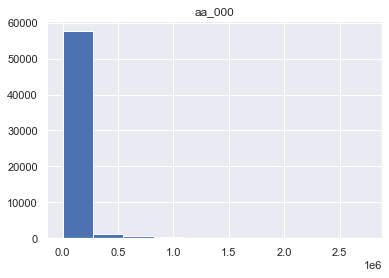

In [14]:
df.hist(column="aa_000");

A histogram only works with numerical data, which means that at this point, the only graphic we will see when using a histogram would be for the aa_000 column. We can also prove it by using the unique function. See the following output.

In [15]:
df["aa_000"].unique()

array([ 76698,  33058,  41040, ...,  83818,  16978, 153002], dtype=int64)

We would get a different outcome when using that same function with a different column. Let's see.

In [16]:
df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

Once again we proved that the feature ab_000 (and many more features from this data set) has missing values (na in this case, which Python do not recognize as missing value, as previously mentioned).

# Dealing with missing data

We will now sustitute all the expressions that Python does not recognize as missing values (NAN) by using the following function. 

In [17]:
missing_value_formats=["n.a","?","NA","n/a","na","--","n-a"]
df=pd.read_csv('aps_failure_set.csv',na_values=missing_value_formats)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


We now know that there are many missing values within this data set. This can be corroborated by using the following function.

In [18]:
df.isnull().values.any()

True

It is true that we have missing values. Next step is getting the total of missing values per feature.

In [19]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In this particular case, the opposite function would be "count", which will give us a glance of all non-NA cells for each column.

In [20]:
df.count()

class     60000
aa_000    60000
ab_000    13671
ac_000    56665
ad_000    45139
          ...  
ee_007    59329
ee_008    59329
ee_009    59329
ef_000    57276
eg_000    57277
Length: 171, dtype: int64

Missing data is a common problem in many disciplines that deal with datasets. So, in the previous step, we have transformed all those missing pieces into something that python actually recognizes as missing data, which are NaN values. Something important (I consider) that I have learnt during the past few weeks is that not because Python says there are no missing values, is true. Thus, we need to carry on our own research.

Speaking of missing data, I spent quite some time on this part of the present work, trying to understand what to do with it, how to solve this issue and what to do next (as I am still trying to learn as much as I can during these past two months that I have been studying Data Analytics) and every time I asked someone about it, I got this answer: "it all depends", and they are actually right. 

Every data set is different and it deserves to be treated as such. Every data set needs to be explored and cleaned. There are too many things to consider in the process, and each one has its level of importance. For that reason, I felt motivated to keep going so I decided to do some more research about it (although it involved more time than the expected on this specific part of the assignment, it was totally worth it for the peace of mind).

In their research on missing data, Graham conclude that: "The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data". (Graham, J.W. 2009 pp.549–576)

According to what I read online (Mack, Su and Westreich, 2018), missing data are frequently grouped into three large categories (each of them with their different acronym): Missing completely at random (MCAR). Missing at random (MAR). Missing not at random (MNAR).

Rubin (Rubin, 1975) did something interesting back in 1975 when he tried to describe and divide the types of missing data according to the assumptions based on the reasons for the missing data. Even though I have been told several times that we are not suppose to make any assumptions, in my opinion this represents the foundation for the three categories in which missing data is grouped.

In [21]:
missing_values=df.isna().sum().sum()
print ("The total number of missing values within this data set is: ", missing_values)

The total number of missing values within this data set is:  850015


Text(0, 0.5, 'Scale')

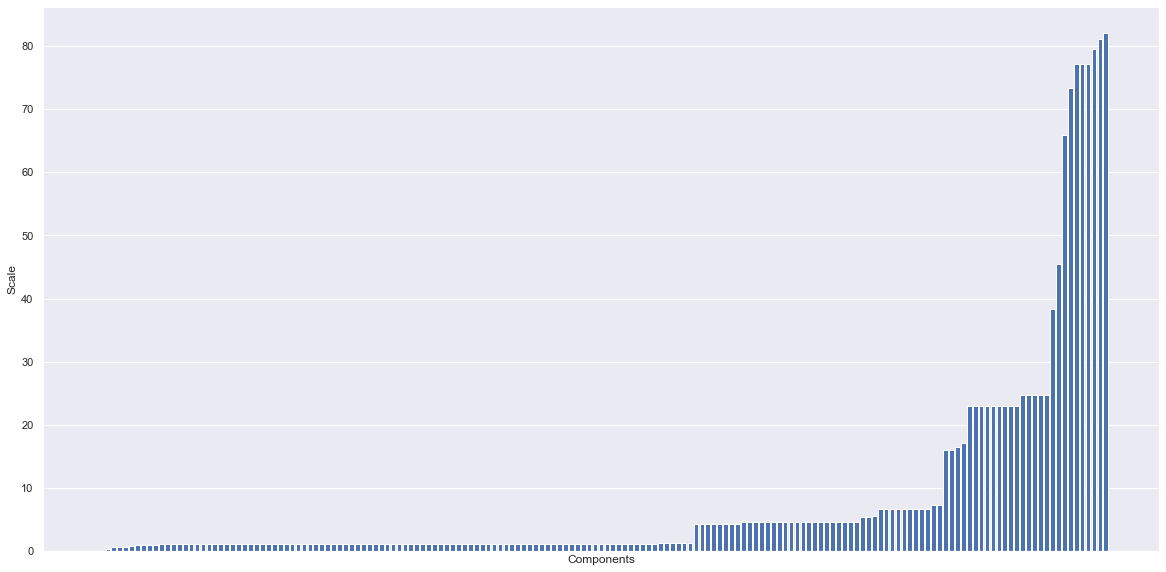

In [22]:
df_missingvalues = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = True)
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_missingvalues.index, df_missingvalues.values.T[0])
plt.xticks([])
plt.xlabel("Components")
plt.ylabel("Scale")

We can see that there are still some features with missing values.

In [23]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

# Duplicate rows

Now we will be looking for duplicate rows.

In [24]:
duplicate_rows_df = df[df.duplicated()]
print("Total number of duplicate rows: ", duplicate_rows_df.shape)

Total number of duplicate rows:  (0, 171)


As the matter of fact, it looks like there are no duplicates within our data set. However we will make sure there are none by using the following function.

In [25]:
df = df.drop_duplicates()
df.head(5) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [26]:
df.shape

(60000, 171)

In [27]:
df.dtypes.apply(pd.api.types.is_sparse)

class     False
aa_000    False
ab_000    False
ac_000    False
ad_000    False
          ...  
ee_007    False
ee_008    False
ee_009    False
ef_000    False
eg_000    False
Length: 171, dtype: bool

# Sparsity
- According to the previous lecture during Data Preparation class, we also need to check for sparse data within the data set by applying the following function. It is a fact that sparse data (data with a lot of zeros in it) it takes a lot more work to find the pattern within the data.

In [28]:
df.dtypes.apply(pd.api.types.is_sparse).any()

False

In [29]:
X = df.iloc[:,:2]
X.shape

(60000, 2)

In [30]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


The previous function displays all the descriptive statistics of the features. We can also get a glance of the five-number summary for each column. As we can appreciate through our eyes in the table above, we can acknowledge that the median and mean of most features are not the same. As a result of this, we can now affirm that we are dealing with skewed distribution. (Kaliyadan and Kulkarni, 2019).

In [31]:
df.skew(axis = 0, skipna = True)

aa_000      6.115752
ab_000     28.085266
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 170, dtype: float64

Therefore, we will replaced all missing values with the median.

In [32]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [33]:
df.fillna(df.median)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,<bound method NDFrame._add_numeric_operations....,2130706438.0,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,<bound method NDFrame._add_numeric_operations....,0.0,<bound method NDFrame._add_numeric_operations....,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,<bound method NDFrame._add_numeric_operations....,228.0,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,70.0,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,<bound method NDFrame._add_numeric_operations....,1368.0,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,<bound method NDFrame._add_numeric_operations....,664.0,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,<bound method NDFrame._add_numeric_operations....,2130706538.0,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2130706432.0,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,<bound method NDFrame._add_numeric_operations....,2130706432.0,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


This function did not work at first so I carried out some research on this and found that there is a pair of parentheses after the word mean.

In [34]:
df.fillna(df.median())

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Next step is imputation.

In [35]:
df=df.fillna(df.median())

In [36]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Analyzing feature "class"

In [37]:
df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [38]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [39]:
df.describe(include=object)

,class
count,60000
unique,2
top,neg
freq,59000


Our independent variable is the column Class, which contains the positive and negatives

In [40]:
df["class"].isna().sum().sum()

0

Just to make sure, we used the previous function to confirm that there are no missing values in the class feature.

We can check if at least 90% of the data is zero by using the following function.

In [41]:
df_float=df.loc[:, df.dtypes == np.float64]
for i in df_float.columns:
    if ((len(df_float[i].loc[df_float[i]==0])/len(df_float))>0.9):
        df_float.drop(i,axis=1,inplace=True)

In [42]:
df_float.head()

,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,2.130706e+09,280.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,0.000000e+00,126.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,2.280000e+02,100.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,7.000000e+01,66.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,1.368000e+03,458.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0


In [43]:
df["class"].interpolate(method="linear",direction="forward")

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

According to the data directory provided alongside with this data set, the feature known as class displays two values: positive and negative, where the positive class represents the component failures related to a particular component of the APS system. Whereas the negative class involves failures for components that has nothing to do with the APS. In the attempt to understand this feature (for myself), I performed the following split between positive class and negative class.


* NEGATIVE CLASS:

In [44]:
neg_df = df.loc[df['class']=='neg'] 
neg_df.shape

(59000, 171)

In [45]:
neg_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [46]:
neg_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5.900000e+04,59000.000000,5.900000e+04,5.900000e+04,59000.000000,59000.000000,5.900000e+04,59000.000000,5.900000e+04,5.900000e+04,...,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04,59000.000000,59000.000000
mean,4.916977e+04,0.159186,3.413828e+08,1.458545e+05,6.420915,10.113695,1.864098e+02,118.777966,1.893990e+03,4.489333e+04,...,3.766780e+05,1.798378e+05,3.802655e+05,3.211445e+05,2.728689e+05,3.069950e+05,1.235156e+05,7.582566e+03,0.078881,0.188712
std,1.100525e+05,1.676375,7.815715e+08,3.534099e+07,157.539593,196.390197,2.032970e+04,5199.421093,5.679639e+04,4.115564e+05,...,8.794547e+05,4.066607e+05,8.894226e+05,6.644783e+05,7.705906e+05,1.630223e+06,3.347041e+05,3.760578e+04,4.019522,8.287229
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.840000e+02,0.000000,1.800000e+01,4.000000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,2.919500e+03,1.158000e+03,2.676000e+03,3.550000e+03,5.060000e+02,1.080000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.041600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,2.326050e+05,1.113460e+05,2.203360e+05,1.895650e+05,9.199700e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.549300e+04,0.000000,8.440000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,4.242200e+05,2.109555e+05,4.481970e+05,3.883570e+05,2.645020e+05,1.613230e+05,1.343825e+05,1.934000e+03,0.000000,0.000000
max,2.434708e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,618212.000000,7.771682e+06,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,3.411102e+07,2.811407e+07,1.195801e+08,1.404564e+07,2.708070e+06,482.000000,1146.000000


* POSITIVE CLASS:

In [47]:
pos_df = df.loc[df['class']=='pos'] 
pos_df.shape

(1000, 171)

In [48]:
pos_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,pos,153204,0.0,182.0,126.0,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
23,pos,453236,0.0,2926.0,126.0,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,pos,72504,0.0,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
115,pos,762958,0.0,152.0,126.0,0.0,0.0,776.0,281128.0,2186308.0,...,233796.0,112086.0,221518.0,189988.0,92432.0,41098.0,3812.0,0.0,0.0,0.0
135,pos,695994,0.0,152.0,126.0,0.0,0.0,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0


In [49]:
pos_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.00000
mean,6.591737e+05,0.358000,3.196248e+07,884.356000,13.266000,36.184000,2151.286000,5.088073e+04,3.988408e+05,2.607326e+06,...,4.363335e+06,1.990703e+06,4.157948e+06,4.552389e+06,3.722770e+06,2.458807e+06,9.458463e+05,5.033454e+04,0.534000,1.05200
std,4.343839e+05,2.232671,2.591220e+08,3409.258456,190.606243,505.012503,22200.958923,2.556007e+05,9.981993e+05,4.242352e+06,...,4.243350e+06,2.131427e+06,4.508698e+06,5.564487e+06,4.597814e+06,3.986379e+06,2.174892e+06,2.203499e+05,11.829572,20.35317
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,3.181575e+05,0.000000,1.520000e+02,126.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.875000e+02,...,1.128516e+06,4.679925e+05,9.026815e+05,8.146555e+05,5.150565e+05,1.364955e+05,7.290500e+03,0.000000e+00,0.000000,0.00000
50%,5.849940e+05,0.000000,1.520000e+02,126.000000,0.000000,0.000000,0.000000,0.000000e+00,1.942000e+03,3.851810e+05,...,2.928360e+06,1.277090e+06,2.523707e+06,2.694827e+06,2.125983e+06,9.094160e+05,6.174200e+04,6.000000e+00,0.000000,0.00000
75%,9.305015e+05,0.000000,9.785000e+02,266.500000,0.000000,0.000000,0.000000,7.762000e+03,3.674930e+05,3.841587e+06,...,6.579874e+06,2.925888e+06,5.909717e+06,6.448106e+06,5.422460e+06,3.086601e+06,4.749230e+05,1.815500e+03,0.000000,0.00000
max,2.746564e+06,48.000000,2.130706e+09,60466.000000,5386.000000,11284.000000,544866.000000,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.700915e+07,5.743524e+07,3.160781e+07,2.605551e+07,1.926740e+07,3.810078e+06,362.000000,606.00000


# Split 

It is my understanding that we are dealing with a skewed distribution, which means that we are require to apply normalization, using the min and max values.

In [50]:
x = df.drop("class", axis = 1)
y = df["class"]

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    aa_000  60000 non-null  int64  
 1    ab_000  60000 non-null  float64
 2    ac_000  60000 non-null  float64
 3    ad_000  60000 non-null  float64
 4    ae_000  60000 non-null  float64
 5    af_000  60000 non-null  float64
 6    ag_000  60000 non-null  float64
 7    ag_001  60000 non-null  float64
 8    ag_002  60000 non-null  float64
 9    ag_003  60000 non-null  float64
 10   ag_004  60000 non-null  float64
 11   ag_005  60000 non-null  float64
 12   ag_006  60000 non-null  float64
 13   ag_007  60000 non-null  float64
 14   ag_008  60000 non-null  float64
 15   ag_009  60000 non-null  float64
 16   ah_000  60000 non-null  float64
 17   ai_000  60000 non-null  float64
 18   aj_000  60000 non-null  float64
 19   ak_000  60000 non-null  float64
 20   al_000  60000 non-null  float64
 21   am_0    60

In [52]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 60000 entries, 0 to 59999
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
60000 non-null  object
dtypes: object(1)
memory usage: 937.5+ KB


During Machine Learning class, in Tutorial 6 we reviewed a very interesting topic: Artificial Neural Networks. During this session, the steps undertaken right after the EDA was training and testing the data, which I wanted to tried here, however probably it is not the best approach. Let's see how it went in the following cells.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [55]:
print(x_train.shape)  
print(y_train.shape)  
print(x_test.shape)  
print(y_test.shape)  

(45000, 170)
(45000,)
(15000, 170)
(15000,)


After this, it is not possible to continue with the normalization. So, we will go back to the splitting of x and y (dependent and independent variables). The data that had been normalized will bring all the samples in the same scale and range. It is recommended to use this normalization method as a key method when the data with which we are working is not consistent.

In order to do that, it is necessary to import the libraries we will need.

In [56]:
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [57]:
scaler = preproc.MinMaxScaler()
x = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x)

Now we will visualize the new values.

In [58]:
data_scaled.values

array([[2.79250729e-02, 0.00000000e+00, 9.99999832e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 0.00000000e+00, 1.07006746e-07, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 0.00000000e+00, 9.99999829e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 0.00000000e+00, 9.99999829e-01, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 0.00000000e+00, 3.27590826e-07, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [59]:
data_scaled.isna().sum().sum()

0

# Outliers

Now that we have dealt with missing values, we need to look for outliers. One of my favourite ways to find outliers is through a box plot. However, there are many other ways to do this.

<AxesSubplot:>

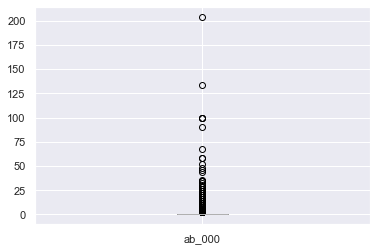

In [60]:
df.boxplot("ab_000")

<AxesSubplot:>

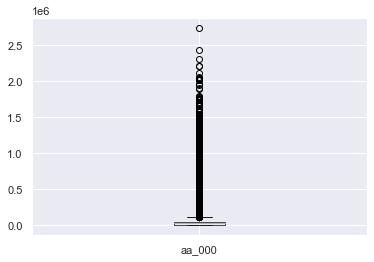

In [61]:
df.boxplot("aa_000")

# Visualizations

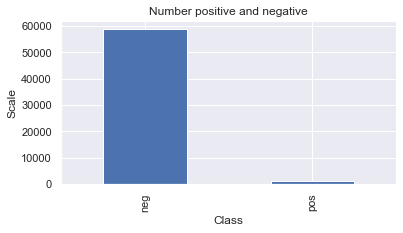

In [62]:
df['class'].value_counts().nlargest(10).plot(kind='bar', figsize=(6,3))
plt.title("Number positive and negative")
plt.ylabel('Scale')
plt.xlabel('Class'); 

<AxesSubplot:xlabel='class', ylabel='count'>

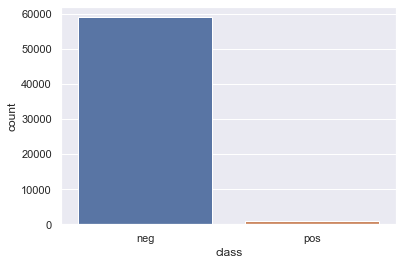

In [63]:
sns.countplot(x='class', data=df.iloc[0:60000])  

<AxesSubplot:>

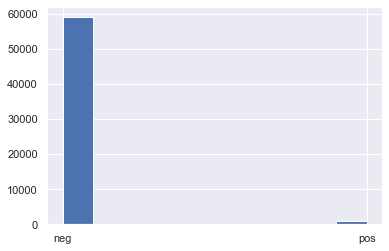

In [64]:
df['class'].hist()

<AxesSubplot:xlabel='ab_000'>

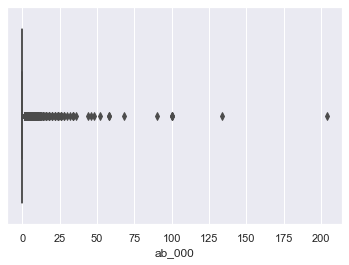

In [65]:
sns.boxplot(df.ab_000)

<AxesSubplot:xlabel='ac_000'>

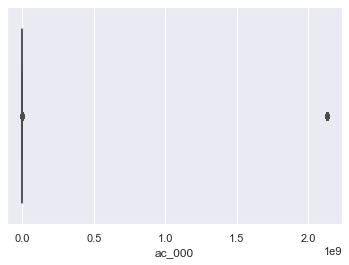

In [66]:
sns.boxplot(df.ac_000)

<AxesSubplot:xlabel='ee_000', ylabel='Density'>

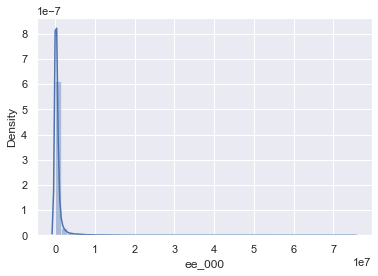

In [67]:
sns.distplot(df.ee_000)

We can also try to see the relation between two random variables from this data set.

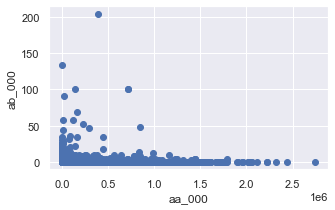

In [68]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(df['aa_000'], df['ab_000'])
ax.set_xlabel('aa_000')
ax.set_ylabel('ab_000')
plt.show()

Now that the data has been scaled, it is possible to apply the mean instead of the median when dealing with the outliers, because now we are dealing with a normal distribution.

In [69]:
lower_limit = data_scaled.mean() - 1.5 * data_scaled.std()
lower_limit

0     -0.057821
1     -0.011610
2     -0.389034
3     -0.006107
4     -0.010959
         ...   
165   -0.018692
166   -0.027694
167   -0.016410
168   -0.013105
169   -0.011116
Length: 170, dtype: float64

In [70]:
upper_limit = data_scaled.mean() + 1.5 * data_scaled.std()
upper_limit

0      0.101029
1      0.013203
2      0.704635
3      0.006140
4      0.011580
         ...   
165    0.024426
166    0.041938
167    0.020764
168    0.013463
169    0.011470
Length: 170, dtype: float64

In [71]:
data_scaled[data_scaled < lower_limit] = np.nan
data_scaled[data_scaled > upper_limit] = np.nan

In [72]:
data_scaled.isna().sum().sum()

238779

In [73]:
column_medians = data_scaled.median()
data_scaled = data_scaled.fillna(column_medians)
display(data_scaled)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.027925,0.0,4.505547e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0
1,0.012036,0.0,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0
2,0.014942,0.0,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0
3,0.000004,0.0,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0
4,0.022164,0.0,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,0.0,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,...,0.012812,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000157,0.007503,0.000000,0.0
59996,0.000832,0.0,4.505547e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000136,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0
59997,0.000041,0.0,4.505547e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000010,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0
59998,0.029234,0.0,4.505547e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.008974,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0


In [74]:
data_scaled.isna()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
data_scaled.isna().sum().sum()

0

# PCA: Principal Component Analysis

Here should start the PCA

## Choosing the number of components 

  Finally we apply the PCA function (jakevdp.github.io, n.d.) to solve the principal question of this assigment, which is to find out how many components we need in order to retain 99.5% variance. This is the percentage we should place between the parentheses, applying it to our scaled data.

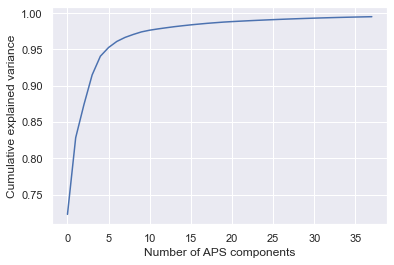

In [76]:
pca = PCA(0.995).fit(data_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Number of APS components") 
plt.ylabel("Cumulative explained variance"); 

Now we need to implement another PCA so we can dimensionally reduce the data to the number of features we have discovered (38).

In [77]:
projected = pca.fit_transform(data_scaled)
projected.shape

(60000, 38)

In [78]:
pca = PCA(n_components=38)
pca.fit(projected)
x_pca = pca.transform(projected)
print("original shape:   ", projected.shape)
print("transformed shape:", x_pca.shape)

original shape:    (60000, 38)
transformed shape: (60000, 38)


# Define the Curse of Dimensionality with my own words.

Basically we can talk about two different types of dimensionality reduction methods. One of them refers to retain only the most important features of the data set and the other one aims at finding a combination of those features which will create a new set of features. In other words, you can either keep the original one but without the irrelevant features, or create a new set by selecting a few of the original features. According to several sources, it is common to work with PCA as dimensionality reduction method is one of the most common actions for linear dimension reduction.

It is my understanding that as we have more dimensions, we are also increasing the complexity and as a consequence processing power we need to analyse the data, and this also increases the amount of training data required to make meaningful models.

# Conclusions

One of the things I have learnt from my previous work experience in Mexico is that every single activity undertaken within a company, needs to lead to a well informed decision. Data preparation and data analysis is no different in regard to that. Every decision should be based on a previous analysis. From my perspective, one of the main goals of this assignment is to develop all the possible skills required for activities related to data.
I have read several sources that states the different steps that the data preparation process goes through.


Fortunately, I was able to find the number of components that are required for retainning the 99.5% variance, however it is sad to say that I was not able to apply the PCA for dimensionally reduction.

# References

- Anon, (2020). Detection and Removal of Outliers in Python - An Easy to Understand Guide - AskPython. [online] Available at: https://www.askpython.com/python/examples/detection-removal-outliers-in-python.[Accessed 13 Nov. 2022].
- Built In. (n.d.). Curse of Dimensionality. [online] Available at: https://builtin.com/data-science/curse-dimensionality [Accessed 13 Nov. 2022].
- docs.python.org. (n.d.). 9. Classes — Python 3.8.4rc1 documentation. [online] Available at: https://docs.python.org/3/tutorial/classes.html [Accessed 13 Nov. 2022].
- docs.python.org. (n.d.). warnings — Warning control — Python 3.8.5 documentation. [online] Available at: https://docs.python.org/3/library/warnings.html [Accessed 13 Nov. 2022].
- pandas.pydata.org. (n.d.). Working with missing data — pandas 1.5.1 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/missing_data.html [Accessed 13 Nov. 2022].
- Graham, J.W. (2009). Missing Data Analysis: Making It Work in the Real World. Annual Review of Psychology, [online] 60(1), pp.549–576. doi:10.1146/annurev.psych.58.110405.085530 [Accessed 13 Nov. 2022].
- jakevdp.github.io. (n.d.). In Depth: Principal Component Analysis | Python Data Science Handbook. [online] Available at: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html [Accessed 13 Nov. 2022].
- kaggle.com. (n.d.). PCA Analysis - APS Scania. [online] Available at: https://www.kaggle.com/code/zilmabezerra/pca-analysis-aps-scania [Accessed 13 Nov. 2022].
- Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, [online] 64(5), p.402. doi:10.4097/kjae.2013.64.5.402  [Accessed 13 Nov. 2022].
- Kaliyadan, F. and Kulkarni, V. (2019). Types of variables, descriptive statistics, and sample size. Indian Dermatology Online Journal, [online] 10(1), pp.82–86. doi:10.4103/idoj.IDOJ_468_18  [Accessed 13 Nov. 2022].
- Kazil, J. and Jarmul, K. (2016). Data wrangling with Python : tips and tools to make your life easier. Sebastopol, Ca: O’reilly.
- Mack, C., Su, Z. and Westreich, D. (2018). Types of Missing Data. [online] www.ncbi.nlm.nih.gov. Agency for Healthcare Research and Quality (US). Available at: https://www.ncbi.nlm.nih.gov/books/NBK493614/ [Accessed 13 Nov. 2022].
- Madley-Dowd, P., Hughes, R., Tilling, K. and Heron, J. (2019). The proportion of missing data should not be used to guide decisions on multiple imputation. Journal of Clinical Epidemiology, 110, pp.63–73. doi:10.1016/j.jclinepi.2019.02.016 [Accessed 13 Nov. 2022].
- Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/ [Accessed 13 Nov. 2022].
- Mckinney, W. (2013). Python for data analysis. Beijing: O’reilly.
- Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.
- numpy.org. (n.d.). numpy.count_nonzero — NumPy v1.23 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html [Accessed 13 Nov. 2022].
- NumPy (n.d.). What is NumPy? — NumPy v1.19 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/user/whatisnumpy.html [Accessed 13 Nov. 2022].
- pandas.pydata.org. (n.d.). pandas.api.types.is_sparse — pandas 1.5.1 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_sparse.html [Accessed 13 Nov. 2022].
- pandas.pydata.org. (n.d.). User Guide — pandas 1.0.4 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/index.html#user-guide [Accessed 13 Nov. 2022].
- Rowntree, D. (2000). Statistics without tears : an introduction for non-mathematicians. Harmondsworth: Penguin.
- Rubin, D.B. (1975). Inference and missing data. Princeton, N.J.: Verlag Nicht Ermittelbar.
- scikit-learn.org. (n.d.). 6.4. Imputation of missing values — scikit-learn 0.22.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/impute.html [Accessed 13 Nov. 2022].
- seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/ [Accessed 13 Nov. 2022].
- SearchBusinessAnalytics. (n.d.). What is Data Preparation? An In-Depth Guide to Data Prep. [online] Available at: https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation [Accessed 13 Nov. 2022].
- Stephanie (2016). Dimensionality & High Dimensional Data: Definition, Examples, Curse of. [online] Statistics How To. Available at: https://www.statisticshowto.com/dimensionality/ [Accessed 13 Nov. 2022].
- Zach (2022). Pandas: How to Fill NaN Values with Median (3 Examples). [online] Statology. Available at: https://www.statology.org/pandas-fillna-with-median/ [Accessed 13 Nov. 2022].